<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Statistics-on-area-overlapped" data-toc-modified-id="Statistics-on-area-overlapped-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Statistics on area overlapped</a></span></li><li><span><a href="#Statistics-intersection-all" data-toc-modified-id="Statistics-intersection-all-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Statistics intersection all</a></span><ul class="toc-item"><li><span><a href="#Importing-data" data-toc-modified-id="Importing-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Importing data</a></span></li><li><span><a href="#Generating-heatmaps" data-toc-modified-id="Generating-heatmaps-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Generating heatmaps</a></span></li><li><span><a href="#Plotting-layers" data-toc-modified-id="Plotting-layers-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Plotting layers</a></span></li></ul></li><li><span><a href="#Map-district-per-urban-type" data-toc-modified-id="Map-district-per-urban-type-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Map district per urban type</a></span></li><li><span><a href="#Total-number-of-buildings/area-for-each-urban-type" data-toc-modified-id="Total-number-of-buildings/area-for-each-urban-type-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Total number of buildings/area for each urban type</a></span></li><li><span><a href="#Global-overview-of-the-various-datasets-per-urban-type" data-toc-modified-id="Global-overview-of-the-various-datasets-per-urban-type-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Global overview of the various datasets per urban type</a></span></li><li><span><a href="#Dataset-comparison-by-country" data-toc-modified-id="Dataset-comparison-by-country-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Dataset comparison by country</a></span></li></ul></div>

# Functions

In [5]:
import warnings
import datetime
warnings.filterwarnings("ignore")
#importing functions
%run 0-[_functions]-0_methods.ipynb

In [6]:
def plot(df_all,x,y,col,hue,xlabel,ylabel,col_wrap=2):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker  # Import ticker module

    sns.set(style="whitegrid")  # Set the style of the plot
    plt.figure(figsize=(8, 8))  # Set the size of the plot

    g = sns.catplot(
        hue=hue, 
        y=y, 
        data=df_all, 
        col=col,
        x=x,
        kind='box',
        col_wrap=col_wrap,
        sym='',
        sharey=False,
        sharex=False
    )

    # Increase the size of ticks
    for ax in g.axes.flat:
        ax.tick_params(axis='both', which='both', labelsize=12)

    # Use scientific notation for all Y-axes
    for ax in g.axes.flat:
        formatter = ticker.ScalarFormatter(useMathText=True, useOffset=False)
        formatter.set_scientific(True)
        formatter.set_powerlimits((-3, 3))  # Adjust power limits based on your data
        ax.yaxis.set_major_formatter(formatter)
        ax.yaxis.major.formatter._useMathText = True

    # Set plot labels and title
    g.set_axis_labels(xlabel, ylabel)

    return plt

# Statistics on area overlapped

In [25]:
#district level
#compute total number of area per distric
df_areas=[]
import pandas as pd
countries=['MT','SE','DK','EL','BE']
for country in countries:
    df_area=pd.read_excel('/mnt/CAS/20240101_foss4g/datasets/out/shared_area_raw/%s/area_overlapped.xlsx' %(country))
    df_area=pd.DataFrame(df_area.groupby(['from','to','country','urban_type'])['building_area_1','building_area_2','shared_area','total_area_1','total_area_2'].sum()).reset_index()

    df_area['perc_shared_area_1']=df_area['shared_area']/df_area['building_area_1']
    df_area['perc_shared_area_2']=df_area['shared_area']/df_area['building_area_2']
    
    df_area['perc_shared_area_1-all']=df_area['shared_area']/df_area['total_area_1']
    df_area['perc_shared_area_2-all']=df_area['shared_area']/df_area['total_area_2']
    
    df_area['country']=country
    df_areas.append(df_area)

for country in countries:
    df_area=pd.read_excel('/mnt/CAS/20240101_foss4g/datasets/out/shared_area_raw/%s/area_overlapped.xlsx' %(country))
    df_area=pd.DataFrame(df_area.groupby(['from','to','country'])['building_area_1','building_area_2','shared_area','total_area_1','total_area_2'].sum()).reset_index()

    df_area['perc_shared_area_1']=df_area['shared_area']/df_area['building_area_1']
    df_area['perc_shared_area_2']=df_area['shared_area']/df_area['building_area_2']
    
    df_area['perc_shared_area_1-all']=df_area['shared_area']/df_area['total_area_1']
    df_area['perc_shared_area_2-all']=df_area['shared_area']/df_area['total_area_2']
    
    df_area['country']=country
    df_area['urban_type']='all'
    df_areas.append(df_area)
df_areas=pd.concat(df_areas)
df_areas.to_excel('/mnt/CAS/20240101_foss4g/datasets/out/shared_area_raw/ALL_area_overlapped_stat.xlsx',index=False)
df_areas

,from,to,country,urban_type,building_area_1,building_area_2,shared_area,total_area_1,total_area_2,perc_shared_area_1,perc_shared_area_2,perc_shared_area_1-all,perc_shared_area_2-all
0,eubucco,jrc,MT,1,1.513486e+08,1.426050e+08,3.420526e+07,4.950755e+07,4.611161e+07,0.226003,0.239860,0.690910,0.741793
1,microsoft,eubucco,MT,1,1.248624e+08,1.925913e+08,3.223348e+07,4.429262e+07,4.950755e+07,0.258152,0.167367,0.727739,0.651082
2,microsoft,jrc,MT,1,6.636786e+07,7.953749e+07,3.981608e+07,4.429262e+07,4.611161e+07,0.599930,0.500595,0.898933,0.863472
3,osm,eubucco,MT,1,5.081315e+07,4.408972e+07,1.356617e+07,1.677033e+07,4.950755e+07,0.266982,0.307695,0.808939,0.274022
4,osm,jrc,MT,1,2.338679e+07,2.605937e+07,1.650339e+07,1.677033e+07,4.611161e+07,0.705671,0.633300,0.984083,0.357901
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,microsoft,eubucco,BE,all,1.368085e+10,3.670350e+09,1.961361e+09,2.586242e+09,2.756630e+09,0.143365,0.534380,0.758383,0.711507
2,microsoft,jrc,BE,all,1.130382e+10,3.991321e+09,1.904512e+09,2.586242e+09,2.675408e+09,0.168484,0.477163,0.736401,0.711858
3,osm,eubucco,BE,all,4.643723e+09,4.098864e+09,2.239569e+09,2.394596e+09,2.756630e+09,0.482279,0.546388,0.935260,0.812430
4,osm,jrc,BE,all,3.720293e+09,4.305027e+09,2.372671e+09,2.394596e+09,2.675408e+09,0.637765,0.551140,0.990844,0.886845


In [26]:
import pandas as pd
import numpy as np
df_areas=pd.read_excel('/mnt/CAS/20240101_foss4g/datasets/out/shared_area_raw/ALL_area_overlapped_stat.xlsx')
overlapping_stats_all=[]
for urban_type in list(df_areas['urban_type'].unique()):
    for country in countries:
        tmp=df_areas[(df_areas['country']==country) &(df_areas['urban_type']==urban_type)]
        if len(tmp)==0:
            continue
        tmp_stat=[]
        for row in tmp.values:
            tmp_stat.append((row[0],row[1],row[-2]*100))
            tmp_stat.append((row[1],row[0],row[-1]*100))
            tmp_stat.append((row[0],row[0],100))
            tmp_stat.append((row[1],row[1],100))
        tmp_stat=pd.DataFrame(tmp_stat).drop_duplicates().reset_index()
        del(tmp_stat['index'])
        tmp_stat.columns=['from','to','value']
        tmp_stat=tmp_stat.pivot(index='from', columns='to', values='value').reset_index()
        tmp_stat['country']=country
        tmp_stat['urban_type']=urban_type
        overlapping_stats_all.append(tmp_stat)
overlapping_stats_all=pd.concat(overlapping_stats_all)
overlapping_stats_all=np.round(overlapping_stats_all,2)
overlapping_stats_all.to_excel('/mnt/CAS/20240101_foss4g/datasets/out/shared_area_raw/ALL_area_overlapped_stat_pivot.xlsx',index=False)
overlapping_stats_all

to,from,eubucco,jrc,microsoft,osm,country,urban_type
0,eubucco,100.00,69.09,65.11,27.40,MT,1
1,jrc,74.18,100.00,86.35,35.79,MT,1
2,microsoft,72.77,89.89,100.00,25.42,MT,1
3,osm,80.89,98.41,67.15,100.00,MT,1
0,eubucco,100.00,98.39,55.44,98.21,SE,1
...,...,...,...,...,...,...,...
3,osm,63.78,98.04,73.74,100.00,EL,all
0,eubucco,100.00,85.87,71.15,81.24,BE,all
1,jrc,88.48,100.00,71.19,88.68,BE,all
2,microsoft,75.84,73.64,100.00,68.65,BE,all


# Statistics intersection all

## Importing data

In [33]:
import pandas as pd
countries=['MT','SE','DK','EL','BE']
df_areas=[]
for country in countries:
    df_area=pd.read_excel('/mnt/CAS/20240101_foss4g/datasets/out/shared_area_raw/%s/area_overlapped_intersection_all.xlsx' %(country))
    df_area=pd.DataFrame(df_area.groupby(['country_osm','urban_type_osm'])['area_sqm_osm','area_sqm_eubucco','area_sqm_jrc','area_sqm_microsoft','shared_area',
                                                                           'total_area_osm','total_area_microsoft','total_area_jrc','total_area_eubucco'].sum()).reset_index()

    df_area['perc_shared_osm']=df_area['shared_area']/df_area['area_sqm_osm']
    df_area['perc_shared_eubucco']=df_area['shared_area']/df_area['area_sqm_eubucco']
    df_area['perc_shared_jrc']=df_area['shared_area']/df_area['area_sqm_jrc']
    df_area['perc_shared_microsoft']=df_area['shared_area']/df_area['area_sqm_microsoft']
    
    
    
    df_area['perc_shared_osm-all']=df_area['shared_area']/df_area['total_area_osm']
    df_area['perc_shared_microsoft-all']=df_area['shared_area']/df_area['total_area_microsoft']
    df_area['perc_shared_jrc-all']=df_area['shared_area']/df_area['total_area_jrc']
    df_area['perc_shared_eubucco-all']=df_area['shared_area']/df_area['total_area_eubucco']
    
    df_areas.append(df_area)
    
for country in countries:
    df_area=pd.read_excel('/mnt/CAS/20240101_foss4g/datasets/out/shared_area_raw/%s/area_overlapped_intersection_all.xlsx' %(country))
    df_area=pd.DataFrame(df_area.groupby(['country_osm'])['area_sqm_osm','area_sqm_eubucco','area_sqm_jrc','area_sqm_microsoft','shared_area',
                                                                           'total_area_osm','total_area_microsoft','total_area_jrc','total_area_eubucco'].sum()).reset_index()
    df_area['urban_type_osm']='all'
    df_area['perc_shared_osm']=df_area['shared_area']/df_area['area_sqm_osm']
    df_area['perc_shared_eubucco']=df_area['shared_area']/df_area['area_sqm_eubucco']
    df_area['perc_shared_jrc']=df_area['shared_area']/df_area['area_sqm_jrc']
    df_area['perc_shared_microsoft']=df_area['shared_area']/df_area['area_sqm_microsoft']
    
    
    
    df_area['perc_shared_osm-all']=df_area['shared_area']/df_area['total_area_osm']
    df_area['perc_shared_microsoft-all']=df_area['shared_area']/df_area['total_area_microsoft']
    df_area['perc_shared_jrc-all']=df_area['shared_area']/df_area['total_area_jrc']
    df_area['perc_shared_eubucco-all']=df_area['shared_area']/df_area['total_area_eubucco']
    
    df_areas.append(df_area)
    
    
df_areas=pd.concat(df_areas)
df_areas.to_excel('/mnt/CAS/20240101_foss4g/datasets/out/shared_area_raw/ALL_area_overlapped_intersection_stat.xlsx',index=False)

## Generating heatmaps

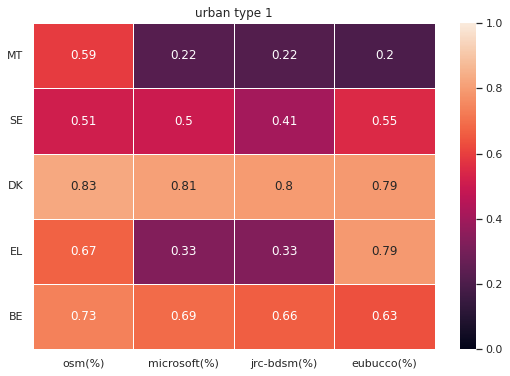

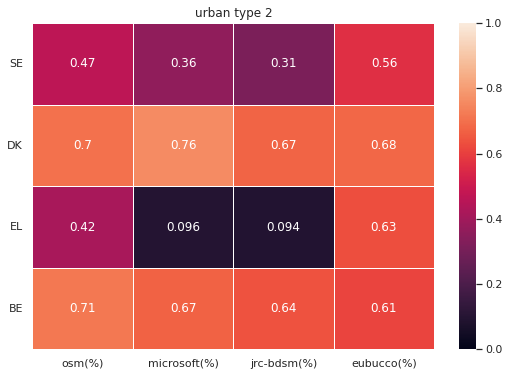

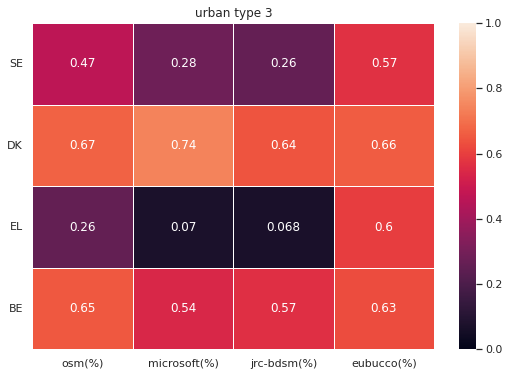

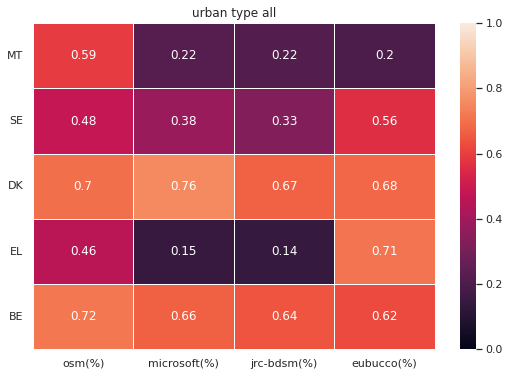

In [62]:
import pandas as pd
df_areas=pd.read_excel('/mnt/CAS/20240101_foss4g/datasets/out/shared_area_raw/ALL_area_overlapped_intersection_stat.xlsx')
for ut in list(df_areas['urban_type_osm'].unique()):
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set_theme()
    tmp=df_areas[df_areas['urban_type_osm']==ut][['country_osm','perc_shared_osm-all','perc_shared_microsoft-all','perc_shared_jrc-all','perc_shared_eubucco-all']]
    tmp.index=tmp['country_osm']
    del(tmp['country_osm'])

    # Draw a heatmap with the numeric values in each cell
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(tmp, annot=True, linewidths=.5, ax=ax,vmin=0, vmax=1)
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    xtick_positions = [0, 1, 2, 3]  # Example positions
    xtick_positions = [i + 0.5 for i in range(len(xtick_positions))]
    xtick_labels = ['Label 1', 'Label 2', 'Label 3', 'Label 4']  # Example labels
    plt.xticks(ticks=xtick_positions, labels=['osm(%)','microsoft(%)','jrc-bdsm(%)','eubucco(%)'])
    plt.ylabel('')
    plt.title('urban type %s'%(ut))
    plt.savefig('/mnt/CAS/20240101_foss4g/plots/overlapping_all/intersection_all_%s.png' %(ut),dpi=300)

## Plotting layers

In [7]:
import pandas as pd
country='MT'
gdfs_osm=load_enriched_data_dask(country,'osm')
gdf_eubucco=load_enriched_data_dask(country,'eubucco')
gdf_jrc=load_enriched_data_dask(country,'jrc-dbsm')
gdf_microsoft=load_enriched_data_dask(country,'microsoft')
gdf_microsoft['microsoft-id']=[str(el) for el in gdf_microsoft['microsoft-id'].values]
intersection=pd.read_csv('/mnt/CAS/20240101_foss4g/datasets/out/shared_area_raw/%s/intersection_all.csv.zip' %(country),compression='zip')

2024-02-12 10:55:41.706709 importing MT osm
2024-02-12 10:55:44.828734 The column area_sqm contains strings. We convert to float
2024-02-12 10:55:44.840212 The column num_vertices contains strings. We convert to float
2024-02-12 10:55:44.851531 importing MT eubucco
2024-02-12 10:55:56.484771 The column area_sqm contains strings. We convert to float
2024-02-12 10:55:56.603538 The column num_vertices contains strings. We convert to float
2024-02-12 10:55:56.737332 importing MT jrc-dbsm
2024-02-12 10:55:59.079855 The column area_sqm contains strings. We convert to float
2024-02-12 10:55:59.120777 The column num_vertices contains strings. We convert to float
2024-02-12 10:55:59.164585 importing MT microsoft
2024-02-12 10:56:02.559162 The column area_sqm contains strings. We convert to float
2024-02-12 10:56:02.613941 The column num_vertices contains strings. We convert to float


In [92]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

int_stat = intersection.groupby(['osm-id'])['country_osm'].count().reset_index().sort_values(ascending=False, by='country_osm').reset_index()
idx = [int_stat.iloc[0]['osm-id'], int_stat.iloc[-1]['osm-id'], int_stat.iloc[int(len(int_stat) / 2)]['osm-id']]
print('plotting ', idx)

import folium
import geopandas as gpd
from shapely.geometry import mapping
from folium.plugins import MiniMap
import folium


# Create a Folium map
for start_id in idx:
    tmp = intersection[intersection['osm-id'] == start_id]
    tmp_gdfs = []
    for gdf, dataset, color in zip([gdfs_osm, gdf_eubucco, gdf_jrc, gdf_microsoft], ['osm', 'eubucco', 'jrc', 'microsoft'], ['black', 'red', 'blue', 'pink']):
        ids = [str(id_) for id_ in list(tmp[f'{dataset}-id'].unique())]
        gdf_ = gdf[gdf[f'{dataset}-id'].isin(ids)]
        # Convert the GeoDataFrame to GeoJSON format
        geojson_data = gdf_.__geo_interface__
        if dataset=='osm':
            m = folium.Map(location=[gdf_.geometry.centroid.y, gdf_.geometry.centroid.x], zoom_start=12)
            

        # Add GeoJSON data as a layer to the Folium map
        folium.GeoJson(
            geojson_data,
            name=dataset,
            style_function=lambda feature, color=color: {
                'name':dataset,
                'color': color,
                'weight': 1,
                'opacity': 1,
                'fillColor': 'none',  # No fill color
            }
        ).add_to(m)
        
        
        tmp_gdfs.append(gdf_[[f'{dataset}-id','source','dataset','country','nuts_id','geometry']])

    for i in range(1, 4):
        if i == 1:
            building_intersection = gpd.overlay(tmp_gdfs[0], tmp_gdfs[i][['geometry']], how='intersection')
        else:
            building_intersection = gpd.overlay(building_intersection, tmp_gdfs[i][['geometry']], how='intersection')

    #cleaning data
    building_intersection['osm-id']=None
    building_intersection['source']=None
    building_intersection['dataset']='Intersection'
    building_intersection

    tmp_gdfs.append(building_intersection)
    # Convert the intersection GeoDataFrame to GeoJSON format
    geojson_data = building_intersection[['osm-id','geometry']].__geo_interface__

    # Add GeoJSON data as a layer to the Folium map
    folium.GeoJson(
        geojson_data,
        name='Intersection',
        style_function=lambda feature: {
            'name':'Intersection',
            'fillColor': 'yellow',
            'color': 'yellow',
            'weight': 1,
            'fillOpacity': 0.3  # Adjust the fill opacity here (e.g., 0.3 for 30% opacity)
        }
    ).add_to(m)

    
    # Create a legend
    legend_html = '''
        <div style="position: fixed; bottom: 50px; right: 50px; z-index:9999; font-size:14px;">
        <p><span style="background-color: black; border-radius: 50%; padding: 2px 6px;"></span> OSM</p>
        <p><span style="background-color: red; border-radius: 50%; padding: 2px 6px;"></span> Eubucco</p>
        <p><span style="background-color: blue; border-radius: 50%; padding: 2px 6px;"></span> JRC</p>
        <p><span style="background-color: pink; border-radius: 50%; padding: 2px 6px;"></span> Microsoft</p>
        <p><span style="background-color: yellow; border-radius: 50%; padding: 2px 6px;"></span> Intersection</p>
        </div>
        '''

    m.get_root().html.add_child(branca.element.Element(legend_html))
    
    # Display the Folium map
    m.fit_bounds(m.get_bounds())
    m.save('/mnt/CAS/20240101_foss4g/plots/overlapping_all/%s_%s.html'%(country,start_id))
    
    #save gpkg
    tmp_gdfs=pd.concat(tmp_gdfs)
    tmp_gdfs.to_file('/mnt/CAS/20240101_foss4g/plots/overlapping_all/%s_%s.gpkg' %(country,start_id),driver='GPKG')

plotting  [908329004, 447446321, 907704492]


# Map district per urban type

<Figure size 864x720 with 0 Axes>

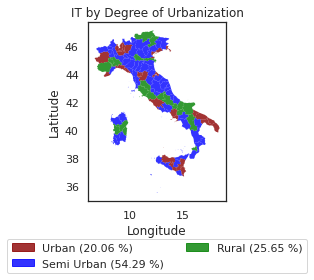

<Figure size 864x720 with 0 Axes>

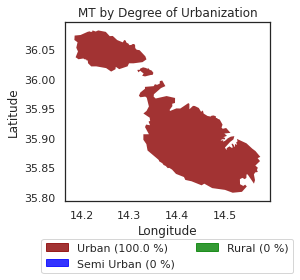

<Figure size 864x720 with 0 Axes>

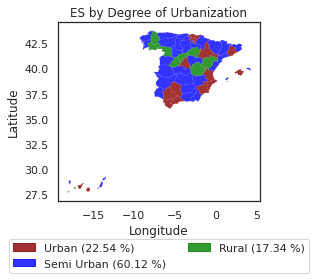

<Figure size 864x720 with 0 Axes>

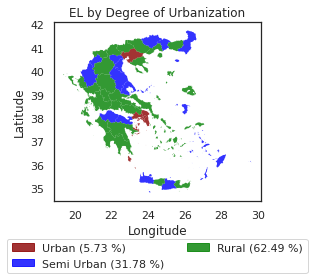

<Figure size 864x720 with 0 Axes>

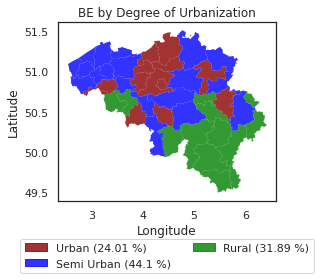

<Figure size 864x720 with 0 Axes>

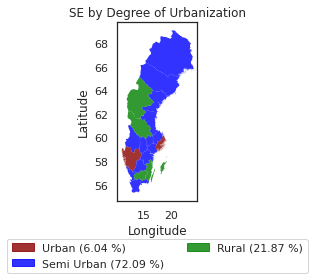

<Figure size 864x720 with 0 Axes>

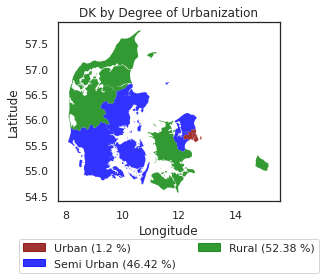

In [145]:
for country in ['IT','MT','ES','EL','BE','SE','DK']:
    plot_country_geometries(country)

# Total number of buildings/area for each urban type

In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd
gdfs_osm=[]

path = '/mnt/CAS/20240101_foss4g/datasets/out/'
onlyfiles = [f for f in listdir(path) if isfile(join(path, f)) if 'output' in f]
onlyfiles =[f for f in onlyfiles if not('IT' in f)]
onlyfiles =sorted([f for f in onlyfiles if not('ES' in f)])
print(onlyfiles)
total_area_buildings=[]
for file in onlyfiles:
    print('processing' , file)
    tmp=pd.read_excel(path+file)
    tmp_stat=tmp.groupby(['country','dataset','urban_type'])['nr_buildings','area_sqm','num_vertices'].sum().reset_index()
    tmp_stat['file']=file
    total_area_buildings.append(tmp_stat)
    
total_area_buildings=pd.concat(total_area_buildings)
print('exporting results')
total_area_buildings.to_excel('/mnt/CAS/20240101_foss4g/datasets/out/all_countries_stat.xlsx',index=False)
total_area_buildings

['BE_eubucco_output.xlsx', 'BE_jrc-dbsm_output.xlsx', 'BE_microsoft_output.xlsx', 'BE_osm_output.xlsx', 'DK_eubucco_output.xlsx', 'DK_jrc-dbsm_output.xlsx', 'DK_microsoft_output.xlsx', 'DK_osm_output.xlsx', 'EL_eubucco_output.xlsx', 'EL_jrc-dbsm_output.xlsx', 'EL_microsoft_output.xlsx', 'EL_osm_output.xlsx', 'MT_eubucco_output.xlsx', 'MT_jrc-dbsm_output.xlsx', 'MT_microsoft_output.xlsx', 'MT_osm_output.xlsx', 'SE_eubucco_output.xlsx', 'SE_jrc-dbsm_output.xlsx', 'SE_microsoft_output.xlsx', 'SE_osm_output.xlsx']
processing BE_eubucco_output.xlsx


/home/gabrlor/.conda/envs/cuda_env/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  from ipykernel import kernelapp as app


processing BE_jrc-dbsm_output.xlsx
processing BE_microsoft_output.xlsx
processing BE_osm_output.xlsx
processing DK_eubucco_output.xlsx
processing DK_jrc-dbsm_output.xlsx
processing DK_microsoft_output.xlsx
processing DK_osm_output.xlsx
processing EL_eubucco_output.xlsx
processing EL_jrc-dbsm_output.xlsx
processing EL_microsoft_output.xlsx
processing EL_osm_output.xlsx
processing MT_eubucco_output.xlsx
processing MT_jrc-dbsm_output.xlsx
processing MT_microsoft_output.xlsx
processing MT_osm_output.xlsx
processing SE_eubucco_output.xlsx
processing SE_jrc-dbsm_output.xlsx
processing SE_microsoft_output.xlsx
processing SE_osm_output.xlsx
exporting results


,country,dataset,urban_type,nr_buildings,area_sqm,num_vertices,file
0,BE,eubucco,1,3893252,1.249106e+09,39999377,BE_eubucco_output.xlsx
1,BE,eubucco,2,3714814,1.268681e+09,28959530,BE_eubucco_output.xlsx
2,BE,eubucco,3,1028048,2.388423e+08,7107787,BE_eubucco_output.xlsx
0,BE,jrc,1,2975609,1.192574e+09,20508580,BE_jrc-dbsm_output.xlsx
1,BE,jrc,2,2980716,1.218025e+09,20715033,BE_jrc-dbsm_output.xlsx
2,BE,jrc,3,653709,2.648088e+08,3985302,BE_jrc-dbsm_output.xlsx
0,BE,microsoft,1,1798035,1.145768e+09,11085356,BE_microsoft_output.xlsx
1,BE,microsoft,2,2192338,1.164003e+09,12740668,BE_microsoft_output.xlsx
2,BE,microsoft,3,567030,2.764717e+08,3230341,BE_microsoft_output.xlsx
0,BE,geofabrik,1,2831423,1.076447e+09,19034695,BE_osm_output.xlsx


# Global overview of the various datasets per urban type 

In [18]:
#applicare log log

import plotly.express as px
# Assuming 'total_area_buildings' is your DataFrame
fig = px.scatter(total_area_buildings, x='nr_buildings', y='area_sqm', color='dataset', facet_col='urban_type', 
                 hover_data={'country': True}, size_max=30, text='country')

# Update facet axis titles
fig.update_xaxes(title_text="Number of Buildings", showgrid=True)
fig.update_yaxes(title_text="Area (sqm)", showgrid=True)

# Update marker size and style
fig.update_traces(marker=dict(size=20, opacity=0.6, line=dict(width=1, color='DarkSlateGrey')), selector=dict(mode='markers'))

# Show the plot
fig.show()
fig.write_html("/mnt/CAS/20240101_foss4g/plots/global/overview_urban_type.html")

In [19]:
import plotly.express as px

# Assuming 'total_area_buildings' is your DataFrame
fig = px.scatter(pd.DataFrame(total_area_buildings.groupby(['country','dataset'])['nr_buildings','area_sqm'].sum()).reset_index(), x='nr_buildings', y='area_sqm', color='dataset',  
                 hover_data={'country': True}, size_max=30, text='country')

# Update facet axis titles
fig.update_xaxes(title_text="Number of Buildings", showgrid=True)
fig.update_yaxes(title_text="Area (sqm)", showgrid=True)

# Update marker size and style
fig.update_traces(marker=dict(size=20, opacity=0.6, line=dict(width=1, color='DarkSlateGrey')), selector=dict(mode='markers'))

# Show the plot
fig.show()
fig.write_html("/mnt/CAS/20240101_foss4g/plots/global/overview_all.html")

# Dataset comparison by country

In [11]:
import pandas as pd
countries=['EL','MT','SE','DK','BE']
df_all=[]
for country in countries:
    df_eubucco=pd.read_excel('/mnt/CAS/20240101_foss4g/datasets/out/%s_eubucco_output.xlsx' %(country))
    df_all.append(df_eubucco)
    
    df_dbsm=pd.read_excel('/mnt/CAS/20240101_foss4g/datasets/out/%s_jrc-dbsm_output.xlsx' %(country))
    #aggregation because of multiple sources osm,esm,
    df_dbsm['source']='jrc'
    df_dbsm=pd.DataFrame(df_dbsm.groupby(['dataset','source','nuts_id','urban_type','country'])['nr_buildings','area_sqm','num_vertices'].sum()).reset_index()
    
    df_osm=pd.read_excel('/mnt/CAS/20240101_foss4g/datasets/out/%s_osm_output.xlsx' %(country))
    db_microsoft=pd.read_excel('/mnt/CAS/20240101_foss4g/datasets/out/%s_microsoft_output.xlsx' %(country))
    df_all.append(db_microsoft)
    
    df_all.append(df_osm)
    df_all.append(df_dbsm)
    
    
df_all=pd.concat(df_all)
df_all['nr_buildings']= [float(val) for val in df_all['nr_buildings'].values]
df_all_country_urban=pd.DataFrame(df_all.groupby(['dataset','country','urban_type'])['nr_buildings','area_sqm','num_vertices'].sum()).reset_index()
df_all.head()

,dataset,source,nuts_id,nuts_name,urban_type,country,nr_buildings,area_sqm,num_vertices
0,eubucco,eubucco,EL301,Βόρειος Τομέας Αθηνών,1,EL,66995.0,2.359186e+07,6465713
1,eubucco,eubucco,EL302,Δυτικός Τομέας Αθηνών,1,EL,5385.0,2.991353e+06,430550
2,eubucco,eubucco,EL303,Κεντρικός Τομέας Αθηνών,1,EL,113578.0,3.707081e+07,11322088
3,eubucco,eubucco,EL304,Νότιος Τομέας Αθηνών,1,EL,69990.0,2.251138e+07,6649733
4,eubucco,eubucco,EL305,Ανατολική Αττική,1,EL,30448.0,1.318354e+07,2576112


In [12]:
pd.DataFrame(df_all.groupby(['dataset','country'])['nr_buildings','area_sqm'].sum())

nr_buildings      area_sqm
dataset   country                            
eubucco   BE          8636114.0  2.756630e+09
          DK          5684734.0  2.344344e+09
          EL           856140.0  3.045613e+08
          MT           141329.0  4.950755e+07
          SE          2504961.0  2.138511e+09
geofabrik BE          6211451.0  2.394596e+09
          DK          3654875.0  2.282757e+09
          EL          1217547.0  4.711567e+08
          MT            20225.0  1.677033e+07
          SE          3050667.0  2.484823e+09
jrc       BE          6610034.0  2.675408e+09
          DK          3765255.0  2.376976e+09
          EL          4540228.0  1.503479e+09
          MT            58247.0  4.611161e+07
          SE          4936573.0  3.616369e+09
microsoft BE          4557403.0  2.586242e+09
          DK          3541845.0  2.111797e+09
          EL          5722750.0  1.474324e+09
          MT            73579.0  4.429262e+07
          SE          6422594.0  3.107971e+09

<Figure size 576x576 with 0 Axes>

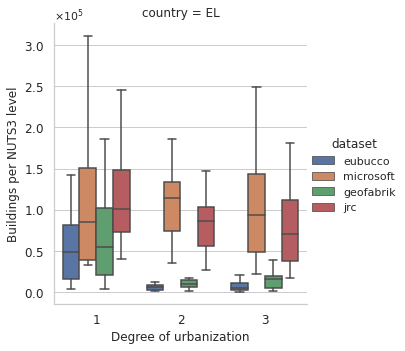

<Figure size 576x576 with 0 Axes>

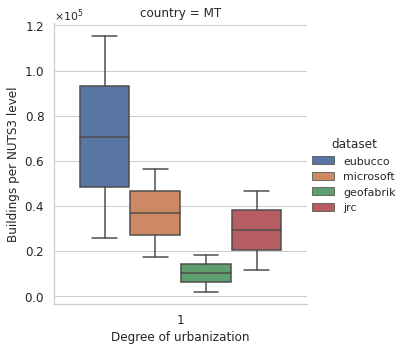

<Figure size 576x576 with 0 Axes>

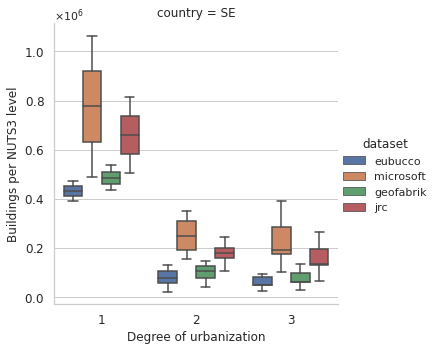

<Figure size 576x576 with 0 Axes>

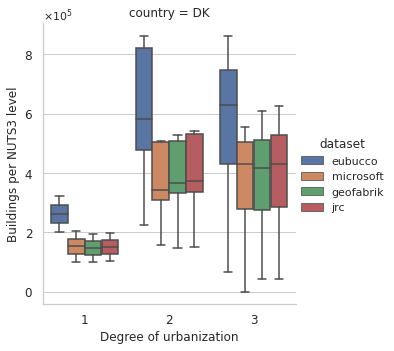

<Figure size 576x576 with 0 Axes>

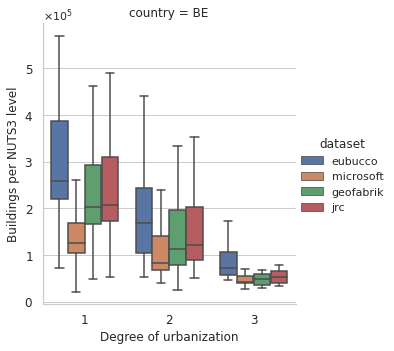

In [13]:
for country in countries:
    hue='dataset'
    y='nr_buildings'
    col='country'
    x='urban_type'
    xlabel='Degree of urbanization'
    ylabel='Buildings per NUTS3 level'
    plt=plot(df_all[df_all['country']==country],x,y,col,hue,xlabel,ylabel,1)
    plt.savefig('/mnt/CAS/20240101_foss4g/plots/countries/%s_%s_urban_type.png' %(country,y),dpi=300)

<Figure size 576x576 with 0 Axes>

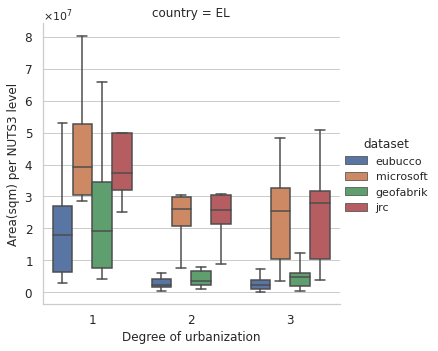

<Figure size 576x576 with 0 Axes>

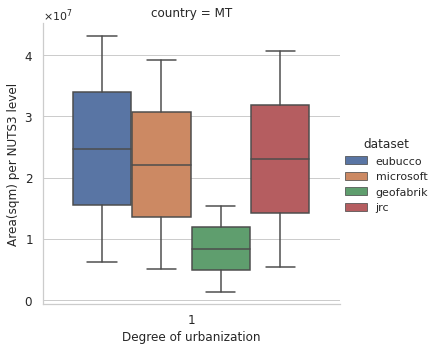

<Figure size 576x576 with 0 Axes>

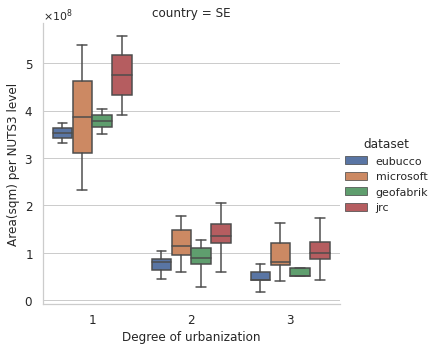

<Figure size 576x576 with 0 Axes>

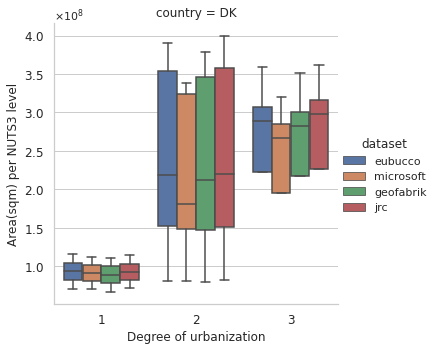

<Figure size 576x576 with 0 Axes>

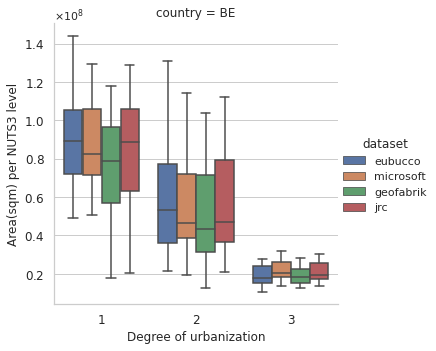

In [73]:
for country in countries:
    hue='dataset'
    y='area_sqm'
    col='country'
    x='urban_type'
    xlabel='Degree of urbanization'
    ylabel='Area(sqm) per NUTS3 level'
    plt=plot(df_all[df_all['country']==country],x,y,col,hue,xlabel,ylabel,1)
    plt.savefig('/mnt/CAS/20240101_foss4g/plots/countries/%s_%s_urban_type.png' %(country,y),dpi=300)

In [21]:
import pandas as pd

tmp=pd.read_csv('/mnt/CAS/20240101_foss4g/datasets/out/shared_area_raw/MT/eubucco_jrc.csv.zip')

In [23]:
tmp[tmp['id']=='v0.1-MLT.1.1_1-0']

,id,height,age,type,id_source,type_source,source_1,dataset_1,country_1,eubucco-id,...,source_2,dataset_2,country_2,jrc-id,area_sqm_2,num_vertices_2,nuts_id_2,urban_type_2,nuts_name_2,shared_area
0,v0.1-MLT.1.1_1-0,14.448998,NaN,NaN,MT-BU-127466,NaN,eubucco,eubucco,MT,v0.1-MLT.1.1_1-0,...,msb,jrc,MT,29473,22170.825194,113,MT001,1,Malta,1865.369634


In [24]:
tmp[tmp['jrc-id']==29473]

,id,height,age,type,id_source,type_source,source_1,dataset_1,country_1,eubucco-id,...,source_2,dataset_2,country_2,jrc-id,area_sqm_2,num_vertices_2,nuts_id_2,urban_type_2,nuts_name_2,shared_area
0,v0.1-MLT.1.1_1-0,14.448998,NaN,NaN,MT-BU-127466,NaN,eubucco,eubucco,MT,v0.1-MLT.1.1_1-0,...,msb,jrc,MT,29473,22170.825194,113,MT001,1,Malta,1865.369634
1,v0.1-MLT.1.1_1-67,20.233699,NaN,NaN,MT-BU-127644,NaN,eubucco,eubucco,MT,v0.1-MLT.1.1_1-67,...,msb,jrc,MT,29473,22170.825194,113,MT001,1,Malta,4704.793777
2,v0.1-MLT.1.1_1-76,16.070999,NaN,NaN,MT-BU-127664,NaN,eubucco,eubucco,MT,v0.1-MLT.1.1_1-76,...,msb,jrc,MT,29473,22170.825194,113,MT001,1,Malta,5960.817236
3,v0.1-MLT.1.1_1-77,18.443001,NaN,NaN,MT-BU-127665,NaN,eubucco,eubucco,MT,v0.1-MLT.1.1_1-77,...,msb,jrc,MT,29473,22170.825194,113,MT001,1,Malta,713.915098
4,v0.1-MLT.1.1_1-111,13.617001,NaN,NaN,MT-BU-128053,NaN,eubucco,eubucco,MT,v0.1-MLT.1.1_1-111,...,msb,jrc,MT,29473,22170.825194,113,MT001,1,Malta,5.119014
5,v0.1-MLT.1.1_1-156,17.407302,NaN,NaN,MT-BU-128099,NaN,eubucco,eubucco,MT,v0.1-MLT.1.1_1-156,...,msb,jrc,MT,29473,22170.825194,113,MT001,1,Malta,3413.873734
6,v0.1-MLT.1.1_1-402,2.567997,NaN,NaN,MT-BU-129481,NaN,eubucco,eubucco,MT,v0.1-MLT.1.1_1-402,...,msb,jrc,MT,29473,22170.825194,113,MT001,1,Malta,8.170372
7,v0.1-MLT.1.1_1-403,2.112999,NaN,NaN,MT-BU-129482,NaN,eubucco,eubucco,MT,v0.1-MLT.1.1_1-403,...,msb,jrc,MT,29473,22170.825194,113,MT001,1,Malta,2.470959
8,v0.1-MLT.1.1_1-404,2.439999,NaN,NaN,MT-BU-129483,NaN,eubucco,eubucco,MT,v0.1-MLT.1.1_1-404,...,msb,jrc,MT,29473,22170.825194,113,MT001,1,Malta,3.719608
9,v0.1-MLT.1.1_1-406,6.473701,NaN,NaN,MT-BU-129485,NaN,eubucco,eubucco,MT,v0.1-MLT.1.1_1-406,...,msb,jrc,MT,29473,22170.825194,113,MT001,1,Malta,27.448248
